In [247]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import euclidean_distances, classification_report, silhouette_samples, silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn import mixture
from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
import umap
import itertools
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", 
        color_codes=True, 
        font_scale = 2)

%matplotlib inline
import mpld3
mpld3.disable_notebook()

In [105]:
os.chdir('/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises')

In [106]:
data = pd.read_csv("/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises/data/card_transactions.csv",
                  delimiter = ",",
                  index_col = "customer_id",
                  #dtype = "float64",
                  verbose = True
                  )

Tokenization took: 9.92 ms
Type conversion took: 9.55 ms
Parser memory cleanup took: 0.03 ms


In [107]:
data.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
customer_id,,,,,,,,,,,,,,,,,
tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [108]:
data.index.is_unique

True

In [109]:
data.isna().sum()

balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

In [110]:
# min payments should be zero when payments are zero:
for i in range(0, len(data.index)):
    if data["payments"][i] == 0:
        data["min_payments"][i] = 0


/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
data[data["credit_limit"].isna() == True]

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
customer_id,,,,,,,,,,,,,,,,,
c2AkRIIj9f7hgiXZ,18.400472,0.0,186.853063,0.0,0.166667,0.0,0.0,0.0,0.0,0.166667,1,0,NaN,6,9.040017,14.418723,0.0


In [112]:
data

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
customer_id,,,,,,,,,,,,,,,,,
tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zdVfd3CYHYBjf61b,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1,0,8500.0,12,662.387331,260.277533,0.000000
JGghMowcxhfbVGKm,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0,11,1500.0,12,141.974905,150.500248,0.166667
5GrEtC6ncxuLpnXZ,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1,0,500.0,9,2437.932505,NaN,0.000000


In [113]:
data["credit_limit"] = data["credit_limit"].fillna(data["credit_limit"].mean())

In [114]:
imputer = KNNImputer(n_neighbors=3)

In [115]:
colnames = data.columns
rownames = data.index
data = pd.DataFrame(imputer.fit_transform(data),
                    columns = colnames,
                    index = rownames
                   )

In [125]:
data

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
customer_id,,,,,,,,,,,,,,,,,
tGEg8fT2eCgVxdwS,-0.744666,-0.414083,-0.468389,-0.352328,0.138183,-0.334153,1.046519,-0.678245,1.144149,-0.673477,-0.474675,-0.187082,-0.960454,-0.385438,-0.563901,-0.317651,0.946810
stEDu20sSKOXomjg,-0.723920,-0.394260,-0.468389,-0.352328,0.520953,-0.287234,1.273196,-0.678245,1.182300,-0.673477,-0.474675,-0.347081,-0.960454,-4.119450,-0.576049,-0.320524,-0.523476
CEB2blrN3b88GsRe,-0.098138,-0.464035,-0.245690,-0.352328,0.520953,-0.452383,-1.220250,-0.678245,-0.916043,0.684186,0.400665,-0.587080,-0.822689,-0.385438,-0.490219,-0.167108,-0.523476
0N0eBl8ySaZThxKE,0.217997,-0.295433,-0.468389,-0.134773,0.520953,-0.452383,1.273196,2.680406,-0.916043,-0.673477,-0.474675,-0.067082,-0.684924,0.361364,-0.351538,-0.017412,-0.523476
6NLauoHUwtwOv4Wy,-0.738436,-0.419933,0.090712,-0.295420,-2.158437,-0.452383,-1.012464,-0.398359,-0.916043,0.156208,-0.037005,-0.547080,-0.547160,0.361364,0.820251,-0.338727,-0.523476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zdVfd3CYHYBjf61b,-0.209690,-0.464035,-0.337957,-0.352328,0.520953,-0.452383,-1.220250,-0.678245,-0.916043,-0.258637,-0.328785,-0.587080,1.106017,0.361364,-0.366005,-0.245130,-0.523476
JGghMowcxhfbVGKm,-0.738872,-0.394534,-0.468389,-0.352328,0.520953,-0.287882,1.065410,-0.678245,1.392136,-0.673477,-0.474675,-0.147082,-0.822689,0.361364,-0.545890,-0.291805,0.048304
5GrEtC6ncxuLpnXZ,-0.749114,-0.464035,-0.346235,-0.352328,-3.689515,-0.452383,-1.220250,-0.678245,-0.916043,-0.120355,-0.328785,-0.587080,-1.098218,-1.879043,0.247727,-0.317929,-0.523476


In [117]:
data.dtypes

balance_account                     float64
purchases_amount                    float64
paid_advance                        float64
full_purchases                      float64
balance_frequency_update            float64
installments                        float64
purchases_frequency                 float64
full_purchases_frequency            float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
nr_cash_advances                    float64
nr_purchases                        float64
credit_limit                        float64
fixed_rate_period                   float64
payments                            float64
min_payments                        float64
full_payment_prc                    float64
dtype: object

In [118]:
data = pd.DataFrame(StandardScaler().fit_transform(data),
                    columns = data.columns,
                    index = data.index
                   )

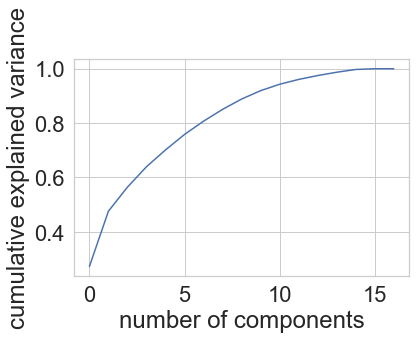

In [119]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [120]:
pc = PCA(n_components = 6).fit_transform(data)

In [121]:
data

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
customer_id,,,,,,,,,,,,,,,,,
tGEg8fT2eCgVxdwS,-0.744666,-0.414083,-0.468389,-0.352328,0.138183,-0.334153,1.046519,-0.678245,1.144149,-0.673477,-0.474675,-0.187082,-0.960454,-0.385438,-0.563901,-0.317651,0.946810
stEDu20sSKOXomjg,-0.723920,-0.394260,-0.468389,-0.352328,0.520953,-0.287234,1.273196,-0.678245,1.182300,-0.673477,-0.474675,-0.347081,-0.960454,-4.119450,-0.576049,-0.320524,-0.523476
CEB2blrN3b88GsRe,-0.098138,-0.464035,-0.245690,-0.352328,0.520953,-0.452383,-1.220250,-0.678245,-0.916043,0.684186,0.400665,-0.587080,-0.822689,-0.385438,-0.490219,-0.167108,-0.523476
0N0eBl8ySaZThxKE,0.217997,-0.295433,-0.468389,-0.134773,0.520953,-0.452383,1.273196,2.680406,-0.916043,-0.673477,-0.474675,-0.067082,-0.684924,0.361364,-0.351538,-0.017412,-0.523476
6NLauoHUwtwOv4Wy,-0.738436,-0.419933,0.090712,-0.295420,-2.158437,-0.452383,-1.012464,-0.398359,-0.916043,0.156208,-0.037005,-0.547080,-0.547160,0.361364,0.820251,-0.338727,-0.523476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zdVfd3CYHYBjf61b,-0.209690,-0.464035,-0.337957,-0.352328,0.520953,-0.452383,-1.220250,-0.678245,-0.916043,-0.258637,-0.328785,-0.587080,1.106017,0.361364,-0.366005,-0.245130,-0.523476
JGghMowcxhfbVGKm,-0.738872,-0.394534,-0.468389,-0.352328,0.520953,-0.287882,1.065410,-0.678245,1.392136,-0.673477,-0.474675,-0.147082,-0.822689,0.361364,-0.545890,-0.291805,0.048304
5GrEtC6ncxuLpnXZ,-0.749114,-0.464035,-0.346235,-0.352328,-3.689515,-0.452383,-1.220250,-0.678245,-0.916043,-0.120355,-0.328785,-0.587080,-1.098218,-1.879043,0.247727,-0.317929,-0.523476


In [167]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]

In [215]:
kmeans = KMeans(n_clusters=6)
d = pd.DataFrame()
d['cluster_label'] = kmeans.fit_predict(data[data.columns[1:len(data.columns)-1]])

AttributeError: 'KMeans' object has no attribute 'bic_'

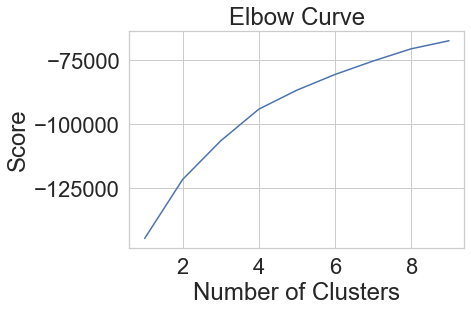

In [147]:
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2092236
For n_clusters = 3 The average silhouette_score is : 0.25119233
For n_clusters = 4 The average silhouette_score is : 0.20005335
For n_clusters = 5 The average silhouette_score is : 0.19248627
For n_clusters = 6 The average silhouette_score is : 0.20174411
For n_clusters = 7 The average silhouette_score is : 0.21336633
For n_clusters = 8 The average silhouette_score is : 0.22103253
For n_clusters = 9 The average silhouette_score is : 0.22535881


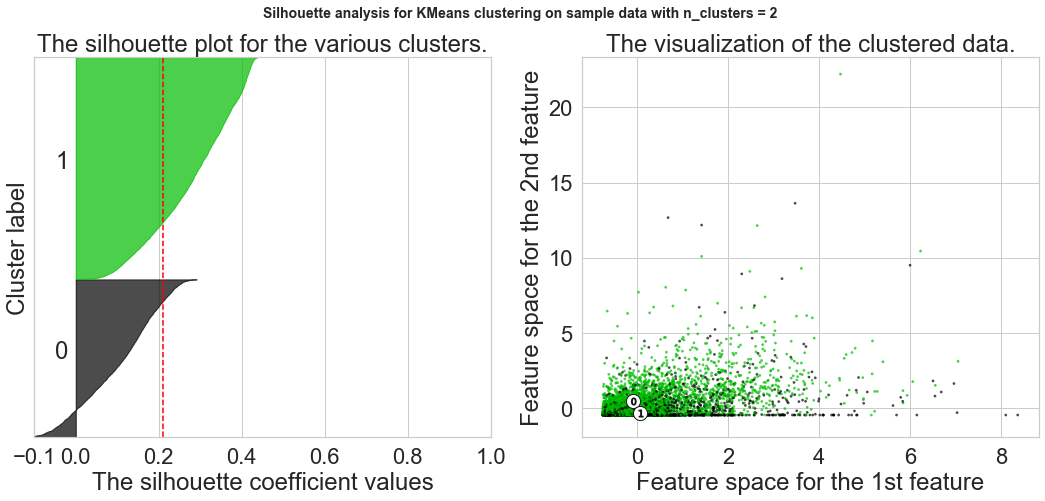

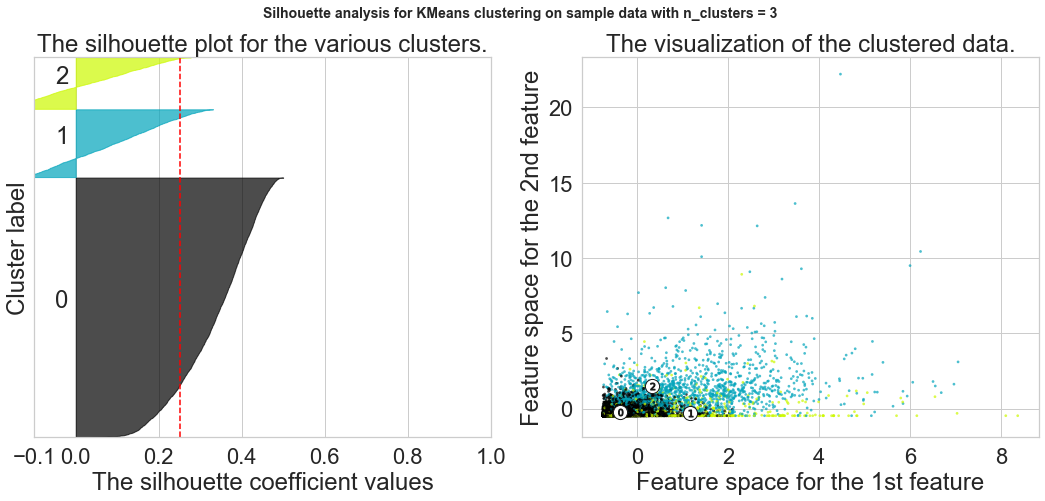

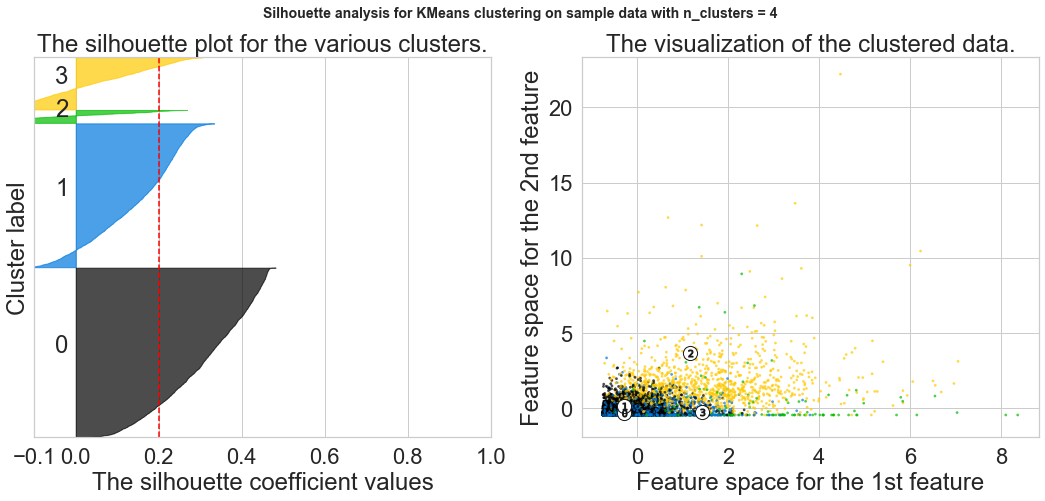

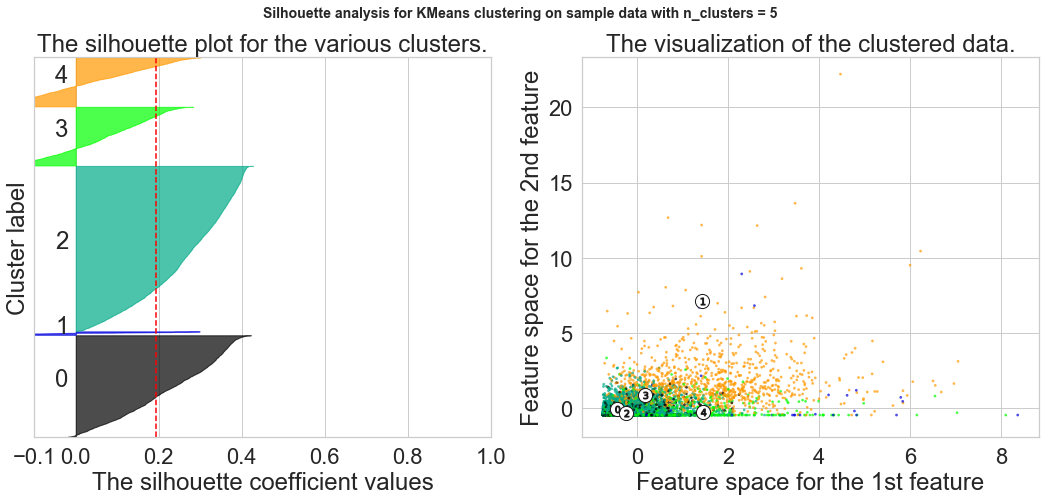

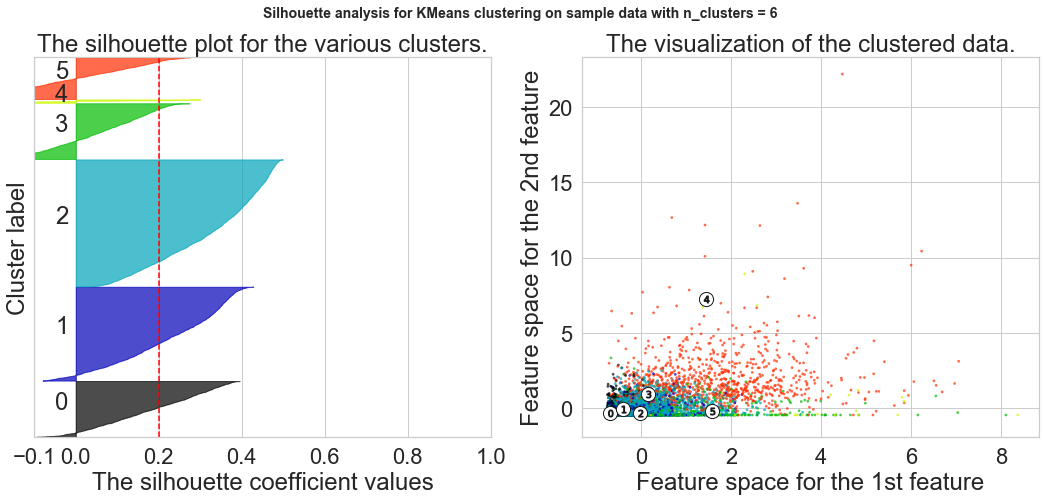

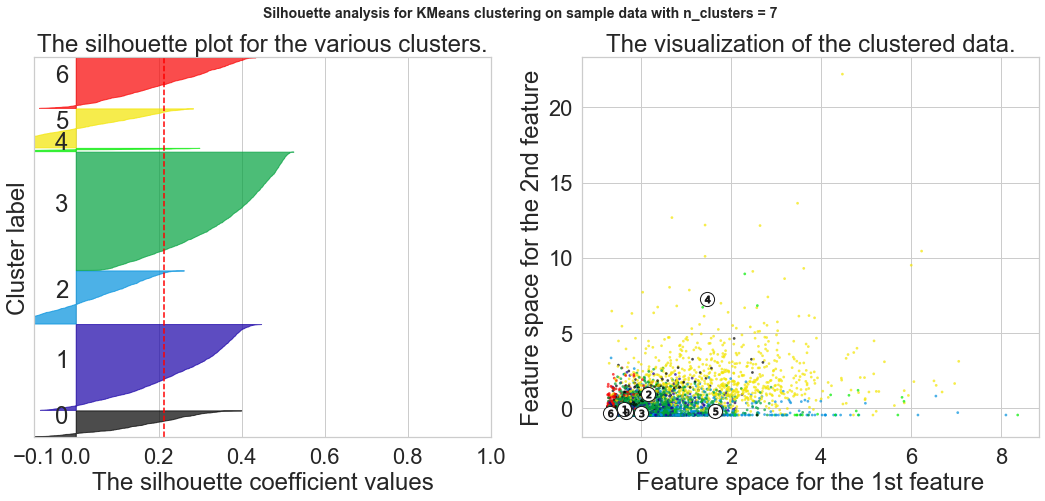

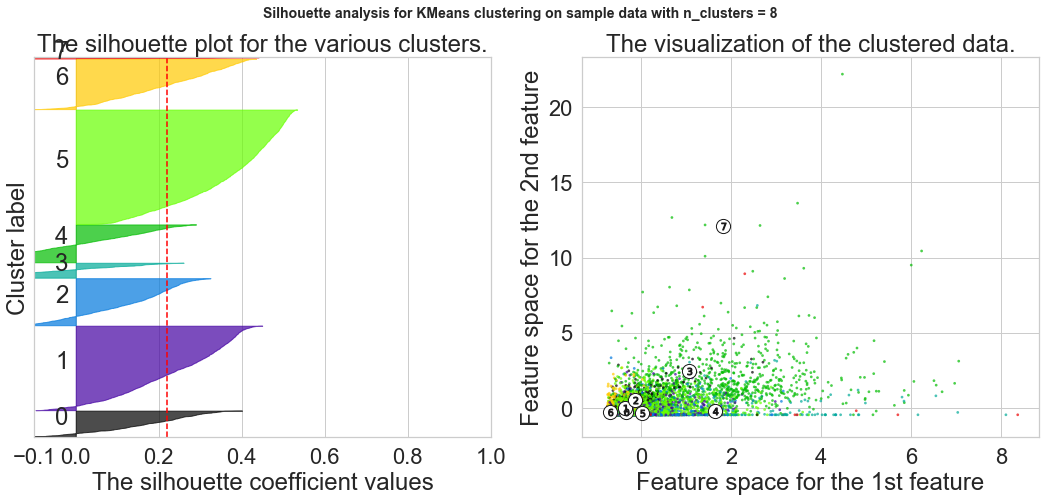

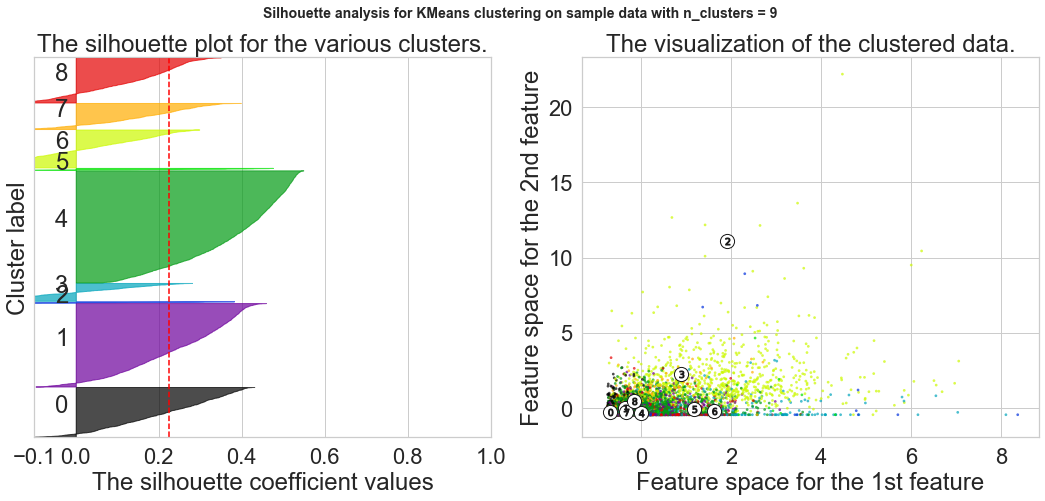

In [149]:
# snippet from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
K_clusters = range(2,10)
# Have to use np methods in the code below,thus the following: 
X = data.values
X = X.astype('float32')

for n_clusters in K_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

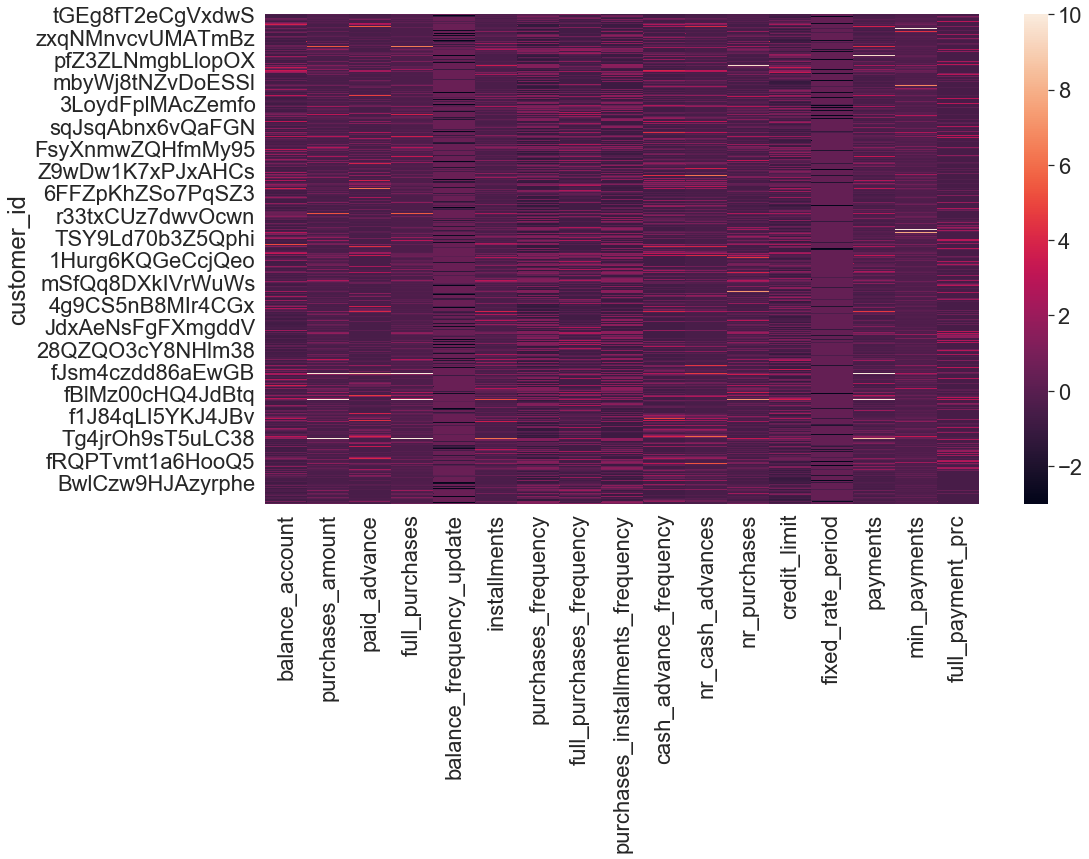

In [134]:
plt.figure(figsize = (16, 9))
sns.heatmap(data,
           vmin = -3,
           vmax = 10);
# useless

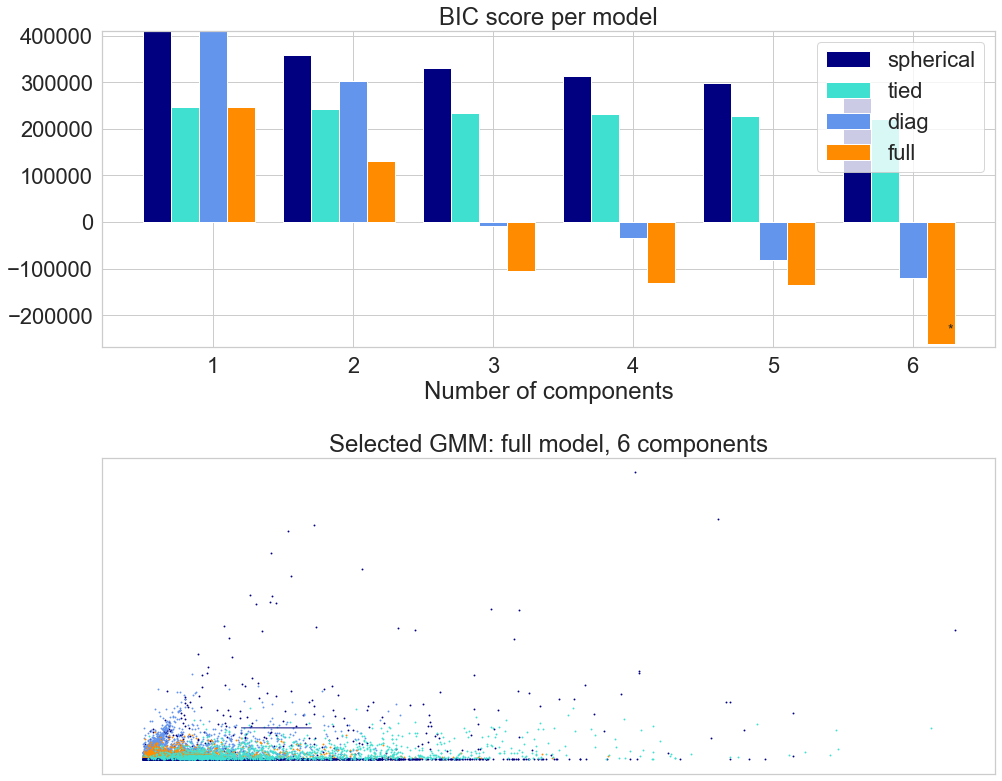

In [214]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(42)
X = np.array(data)

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(16, 12))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = np.linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 6 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [216]:
bic.min()

-261569.69118907794

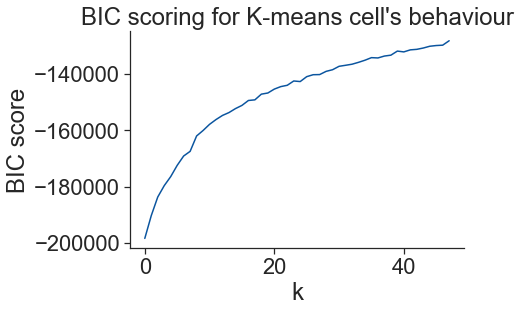

In [249]:
def bic(clusters, centroids):
    num_points = sum(len(cluster) for cluster in clusters)
    num_dims = clusters[0][0].shape[0]
    log_likelihood = _loglikelihood(num_points, num_dims, clusters, centroids)
    num_params = _free_params(len(clusters), num_dims)
    return log_likelihood - num_params / 2.0 * np.log(num_points)


def _free_params(num_clusters, num_dims):
    return num_clusters * (num_dims + 1)


def _loglikelihood(num_points, num_dims, clusters, centroids):
    ll = 0
    for cluster in clusters:
        fRn = len(cluster)
        t1 = fRn * np.log(fRn)
        t2 = fRn * np.log(num_points)
        variance = _cluster_variance(num_points, clusters, centroids) or np.nextafter(0, 1)
        t3 = ((fRn * num_dims) / 2.0) * np.log((2.0 * np.pi) * variance)
        t4 = (fRn - 1.0) / 2.0
        ll += t1 - t2 - t3 - t4
    return ll

def _cluster_variance(num_points, clusters, centroids):
    s = 0
    denom = float(num_points - len(centroids))
    for cluster, centroid in zip(clusters, centroids):
        distances = euclidean_distances(cluster, centroid)
        s += (distances*distances).sum()
    return s / denom

from scipy.spatial import distance
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)


dt_trans = np.array(data)
sns.set_style("ticks")
sns.set_palette(sns.color_palette("Blues_r"))
bics = []
for n_clusters in range(2,50):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(dt_trans)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    clusters = {}
    for i,d in enumerate(kmeans.labels_):
        if d not in clusters:
            clusters[d] = []
        clusters[d].append(dt_trans[i])

    bics.append(compute_bic(kmeans,dt_trans))#-bic(clusters.values(), centroids))

plt.plot(bics)
plt.ylabel("BIC score")
plt.xlabel("k")
plt.title("BIC scoring for K-means cell's behaviour")
sns.despine()
#plt.savefig('figures/K-means-BIC.pdf', format='pdf', dpi=330,bbox_inches='tight')

In [251]:
bics[5]

-172454.53241102956

In [252]:
-261569.69118907794 <-172454.53241102956

True

In [224]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [183]:
reducer = umap.UMAP(n_components = 3,
                    n_neighbors = 45)

In [184]:
embedding = reducer.fit_transform(data)
embedding.shape

/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


(8500, 3)

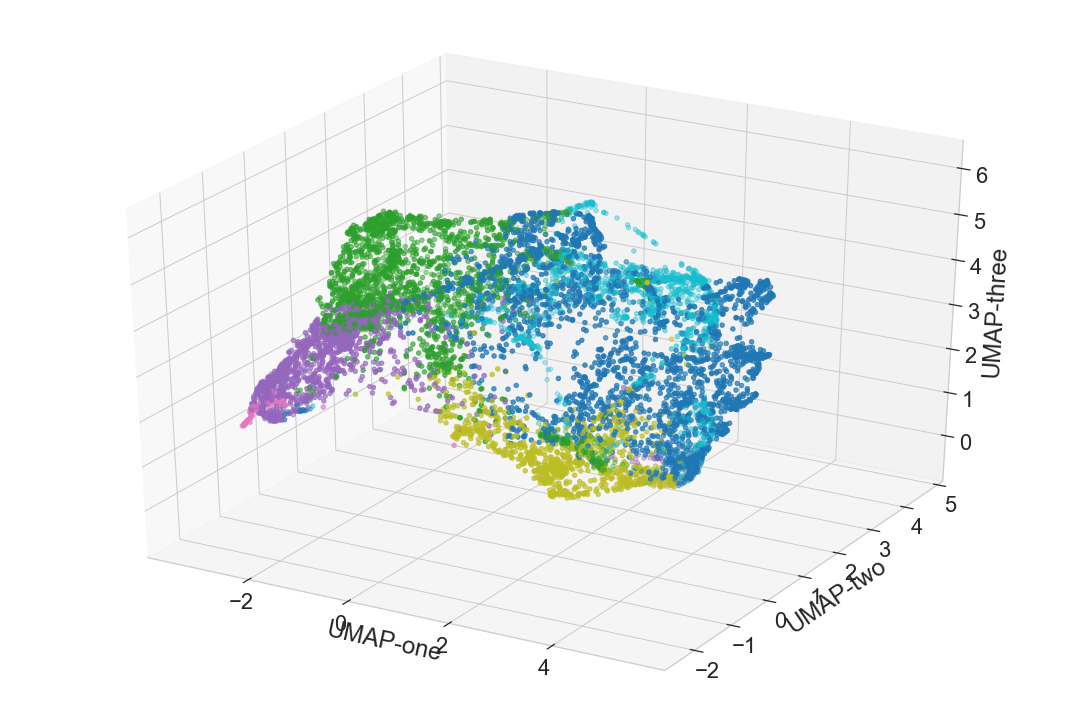

In [185]:
ax = plt.figure(figsize=(19,13)).gca(projection='3d')
ax.scatter(
    xs=pd.DataFrame(embedding)[0], 
    ys=pd.DataFrame(embedding)[1], 
    zs=pd.DataFrame(embedding)[2], 
    c = d['cluster_label'],
    cmap='tab10'
)
ax.set_xlabel('UMAP-one')
ax.set_ylabel('UMAP-two')
ax.set_zlabel('UMAP-three')
plt.show()

/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


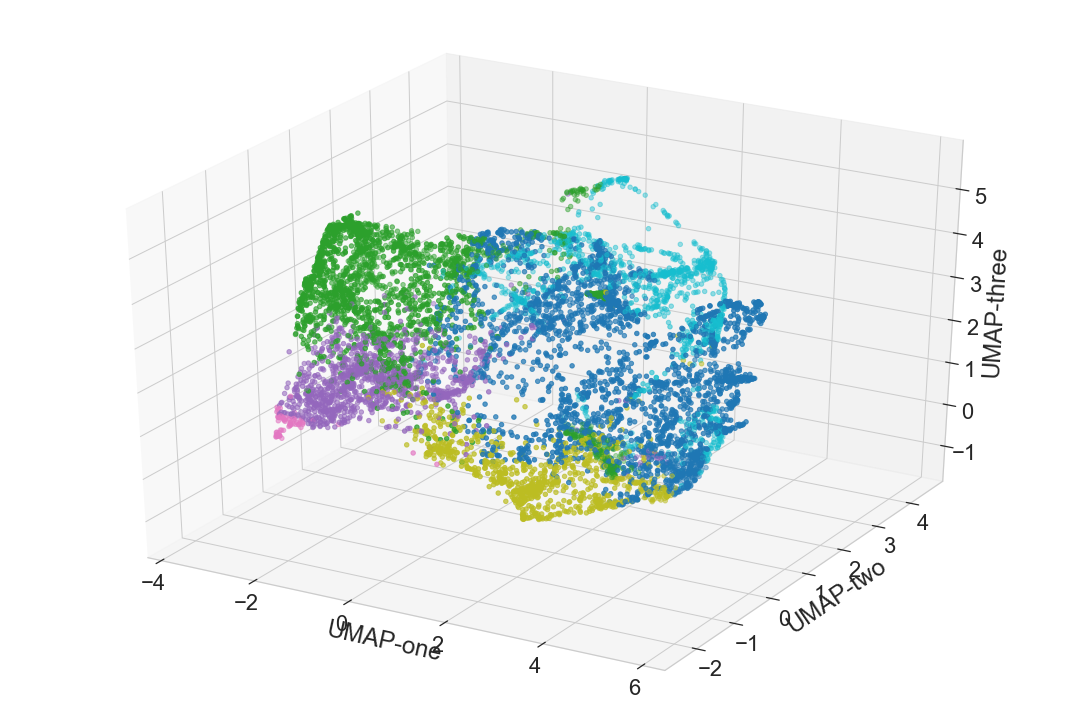

In [182]:
reducer = umap.UMAP(n_components = 3,
                    n_neighbors = 35)
embedding = reducer.fit_transform(data)
embedding.shape

ax = plt.figure(figsize=(19,13)).gca(projection='3d')
ax.scatter(
    xs=pd.DataFrame(embedding)[0], 
    ys=pd.DataFrame(embedding)[1], 
    zs=pd.DataFrame(embedding)[2], 
    c = d['cluster_label'],
    cmap='tab10'
)
ax.set_xlabel('UMAP-one')
ax.set_ylabel('UMAP-two')
ax.set_zlabel('UMAP-three')
plt.show()
